## Part 2 - 2.1 and 2.2 together

In [31]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#rain1 event data
rain_data = pd.read_csv('data/rain1.csv')
rain_input = rain_data.iloc[:, 1].values  # Load rain input u

#simulation parameters
np.random.seed(0)  #random seed for reproducibility
a = 0.05  #Transition rate
sigma1_sq = 0.01  #Variance of the system noise
sigma2_sq = 1  #Variance of the observation noise
#p = np.sqrt(sigma1_sq)  #p for state-dependent noise scaling

C = np.vstack([0,0,0,1])
B = np.hstack([1,0,0,0])


#Transition matrix A
A = np.array([[1-a, 0, 0, 0],
              [a, 1-a, 0, 0],
              [0, a, 1-a, 0],
              [0, 0, a, 0.98]])


In [22]:
X = np.zeros((len(rain_input), 4))  #State vector

In [24]:
def G(X): 
    ret= np.diag([
        np.sqrt(np.abs(X[0])),
        np.sqrt(np.abs(X[1])),
        np.sqrt(np.abs(X[2])),
        np.sqrt(np.abs(X[3])),
    ])
    return ret 


In [29]:
B.T

array([[1, 0, 0, 0]])

In [30]:
rain_input[i-1] 

0.016

In [33]:
A @ X[i-1] + B.T * rain_input[i-1] 

array([0.016, 0.   , 0.   , 0.   ])

In [34]:
G(X[i-1]) @ np.random.randn(4)

array([0., 0., 0., 0.])

In [37]:
Y = np.zeros((len(rain_input), 1))  #Observation vector

In [35]:
for i in range(1, len(rain_input)):
    X[i] = A @ X[i-1] + B.T * rain_input[i-1]  + G(X[i-1]) @ np.random.randn(4)
    Y[i] = C @ X[i] + np.sqrt(sigma2_sq) * np.random.randn(1)

In [36]:
X

array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00],
       [ 1.60000000e-02,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00],
       [ 2.14373323e-03,  8.00000000e-04,  0.00000000e+00,
         0.00000000e+00],
       ...,
       [ 1.62876526e+00,  2.25392714e-01, -1.86432389e+00,
        -1.98266370e-01],
       [ 4.04059262e-01,  5.55883096e-01, -1.62511727e+00,
        -1.99718208e-01],
       [ 1.05703392e+00, -2.14107238e-01, -2.60632854e+00,
         2.84869782e-01]])

In [ ]:

#Input matrix B
B = np.array([[1], [0], [0], [0]])
#Output matrix C
C = np.array([[0, 0, 0, 1]])
#Initial state vector
X0 = np.array([[0], [0], [0], [0]])
#N of time points to simulate
n = len(rain_input)

#in this arrays we are saving the output and states
Y = np.zeros(n)
X = np.zeros((n, 4))
#initial states
X[0, :] = X0.flatten()



#simulation generator
for i in range(1, n):
    #State-dependent noise matrix G(Xt-1)
    G = np.diag(p * np.abs(X[i-1, :]))
    #System noise
    e1 = (G @ np.random.randn(4, 1)).flatten()
    #state updating
    X[i, :] = A @ X[i-1, :] + B.flatten() * rain_input[i-1] + e1
    #observation with noise
    e2 = np.sqrt(sigma2_sq) * np.random.randn(1)
    Y[i] = C @ X[i, :] + e2


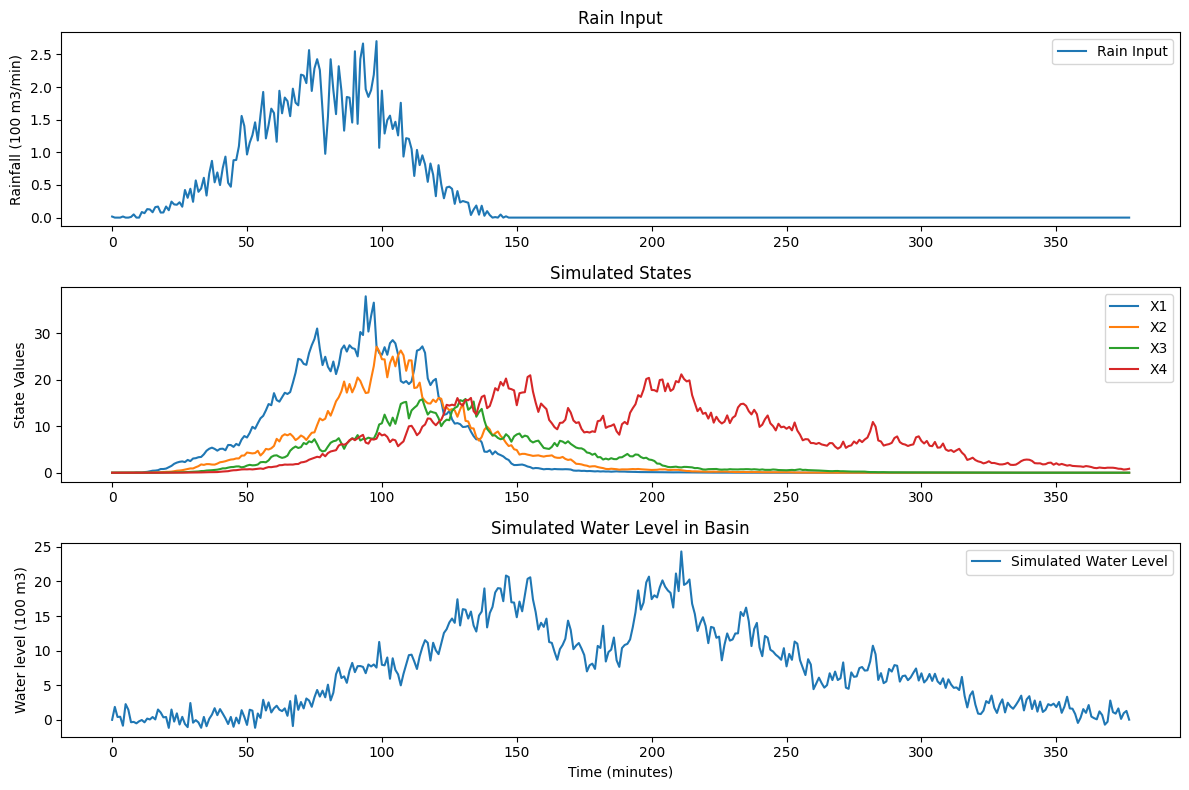

In [7]:

plt.figure(figsize=(12, 8))
plt.subplot(311)
plt.plot(rain_input, label='Rain Input')
plt.title("Rain Input")
plt.ylabel("Rainfall (100 m3/min)")
plt.legend()

plt.subplot(312)
plt.plot(X, label=['X1', 'X2', 'X3', 'X4'])
plt.title("Simulated States")
plt.ylabel("State Values")
plt.legend()

plt.subplot(313)
plt.plot(Y, label='Simulated Water Level')
plt.title("Simulated Water Level in Basin")
plt.xlabel("Time (minutes)")
plt.ylabel("Water level (100 m3)")
plt.legend()

plt.tight_layout()
plt.show()